# Darcy at home, Part 3: Analysis

Welcome to the Darcy experiment, which is one of the practical exercises in CTB2410. In this notebook, you will find the tools to analyse your data and determine the two soil parameters we want to find, drainable porosity, $DP$ (-), and hydraulic conductivity, $K$ (m/s). Note that we will mainly use meters and seconds, which may result in some very small numbers as aquifers can have conductivities as low as a few meters per month. You may first simply want to run the Notebook as is to see what the idea is. Data from a a test have been included for this purpose.


In [1]:
# This cell imports the necessary libraries
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
import csv
# import pandas as pd

# This class helps printing in different fonts, may not work the same on all operating systems
class font:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
# print(font.BOLD+'Hello world!') # See http://ascii-table.com/ansi-escape-sequences.php

## 3.0 Results Parts 1&2
First, create a folder in which this Jupyter Notebook is stored together with all other data and the photos/screenshots of the experiment (see Parts 1 & 2). When finished, this folder needs to be Zipped and uploaded into Brightspace under the correct Assignment.

To expedite grading the assignment, please include the main results from Parts1&2 here. This regards the following files:
* 1234567_setup.jpg
* 1234567_wet_mu.jpg
* 1234567_dry_mu.jpg
* 1234567_K0.jpg
* 1234567_K1.jpg
…
* 1234567_Kend.jpg
* 1234567_H.jpg (screenshot of 1234567_H.csv !)

Instead of '1234567' the name should include your student number. The best way to include a picture is to edit the 'src' (double click on the pictures to edit) and replace the present file names with the correct ones. Running the cell again will show your picture(s). The present pictures serve as example and will then no longer be shown.

#### 1234567_setup.jpg, 1234567_wet_mu.jpg, 1234567_dry_mu.jpg
<img src="1234567_setup.jpg" alt="Kn" style="width: 25%;">
<img src="1234567_wet_mu.jpg" alt="Kn" style="width: 25%;">
<img src="1234567_dry_mu.jpg" alt="Kn" style="width: 25%;">

#### 1234567_K0.jpg, 1234567_K1.jpg, ..., 1234567_Kend.jpg
<img src="1234567_K4.jpg" alt="H" style="width: 25%;">

#### 1234567_H.jpg
<img src="1234567_H.jpg" alt="H" style="width: 25%;">

## 3.1 Analysis drainable porosity

Enter the measured values by replacing the given values with the ones you measured. Running the cell should give you the wet drainable porosity and the total porosity. In reality, the real value will be in between these two values.

In [2]:
# Enter the correct values you measured. See Part 2 for the exact meaning of these parameters. 
# You can work with millimeters or centimeters here, as long as you are consistent.

# Wet experiment
L_wet = 40.          # Height of wet soil column (mm)
mu_wet1 = 73        # Height of water in measuring cylinder before experiment (mm)
mu_wet2 = 68        # Height of water in measuring cylinder after experiment (mm)

# Dry experiment
L_dry = 54.          # Height of dry soil column (mm)
mu_dry1 = 49        # Height of water after glass poured into empty measuring cylinder (mm)
mu_dry2 = 84        # Height of water after glass poured into measuring cylinder with dry soil (mm)

# Calculate drainable porositie and report
# Wet
DP_wet = (mu_wet1 - mu_wet2)/L_wet
print('The wet drainable porosity, mu_wet, equals'
              +'\033[1m'+'\033[4m',f"{DP_wet:5.3}", '\033[m' '(-)')

# Total
DP_dry = (L_dry + mu_dry1 - mu_dry2) / L_dry

print('The total porosity, mu_dry, equals'
              +'\033[1m'+'\033[4m',f"{DP_dry:5.3}", '\033[m' '(-)')


The wet drainable porosity, mu_wet, equals 0.125 (-)
The total porosity, mu_dry, equals 0.352 (-)


## 3.2 Analysis hydraulic conductivity test


### 3.2.1 Set-up differential equation
We start with Darcy's Law:

\begin{equation}Q(t) = A K \frac{\Delta \Psi(t)}{L}\end{equation} 
In which:

\begin{align}
\ Q(t) &: Flow\ rate\ (m^{3} s^{-1})\ \\
\ A &: Cross-section\ column\ (m^{2})\ \\
\ K &: Hydraulic\ conductivity\ (m s^{-1}\,\ to\ be\ determined)\ \\
\ \Delta \Psi(t) &: Potential\ drop\ over\ sand\ column\ (m)\ \\
\ L &: Length\ of\ sand\ column\ (m)\ \\
\end{align}

Because the profile is straight, we can divide left and right by $A$, giving us $\frac{Q(t)}{A}=H(t)$. The sketch below shows the set-up. By our definition, $H(t)=0$ when the water level has just reached the top of the sand column, which happens at $t_{end}$, or $H(t_{end})=0$. We also define $H(0)=H0$. Now derive the differential equation for $H(t)$:
\begin{equation} \frac{dH(t)}{dt}=f(H,t)\end{equation} 

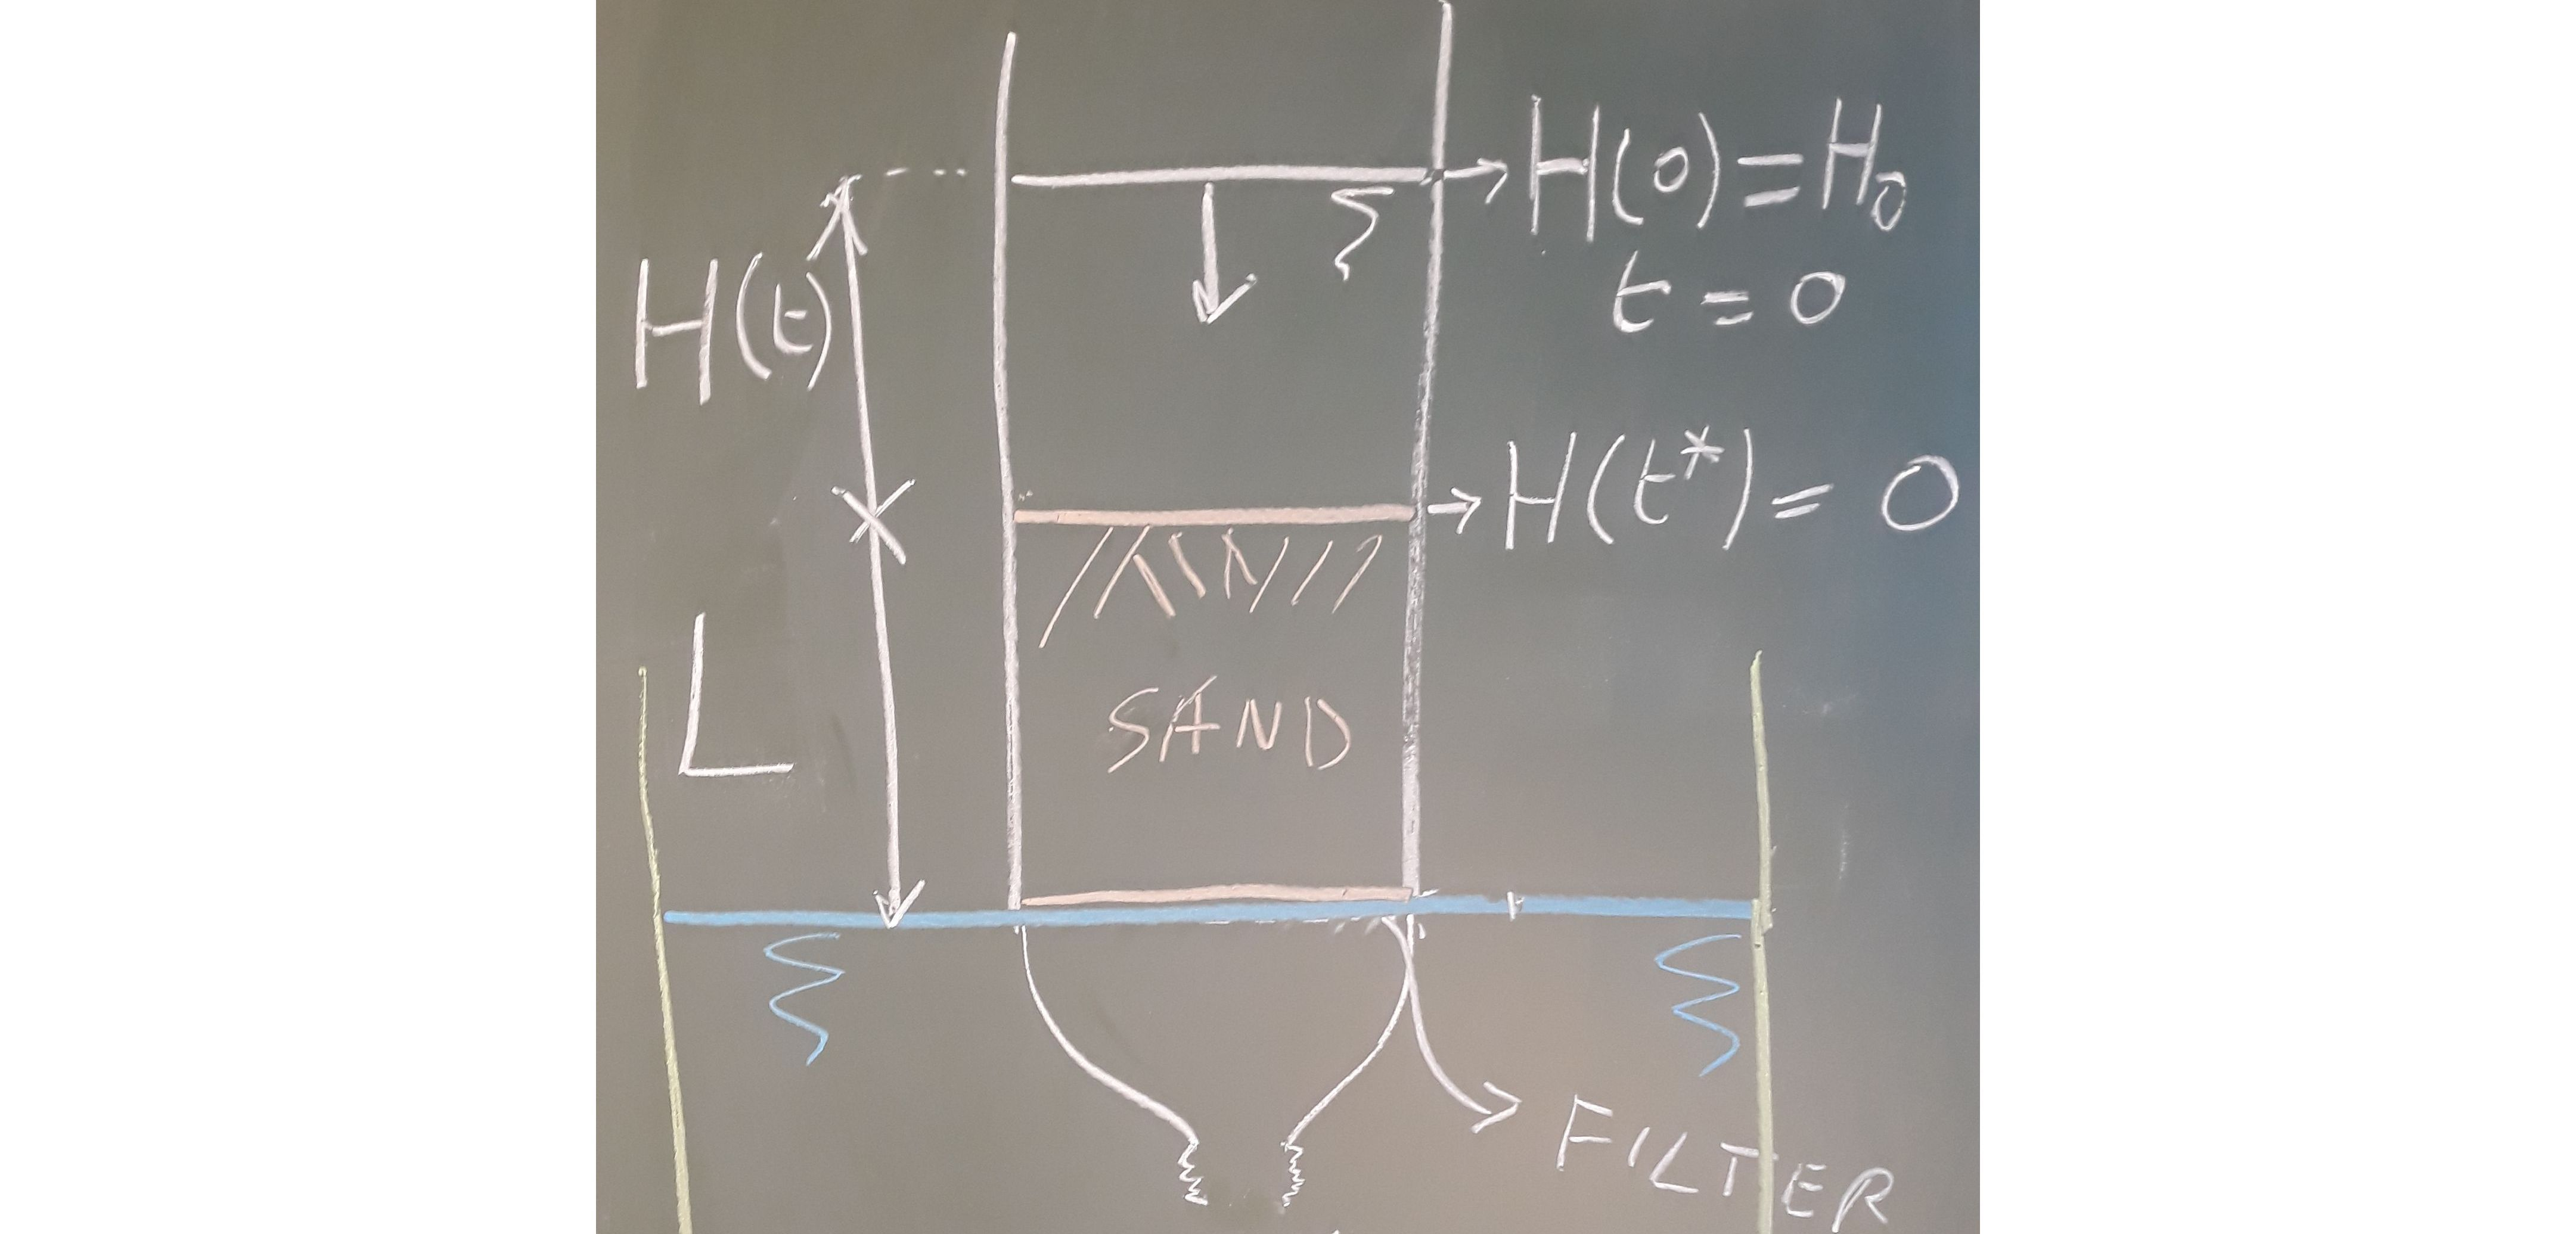 \
\
In the cell below enter the correct expression, $f(H,t)$, for the derivative of the water level, $H(t)$, above the sand.

In [3]:
# This function is the right hand side of the differential equation, f(H,t) above
# HINT: The correct right-hand side is likely to contain H
def diffeq(H,t): #Don't change these input arguments

    # Write here the expression for the differential equation dH/dt:
    
    #   Replace "K*(-0.000400038023*(t**2)+0.05772243346*t-3.39277566540)" 
    #   with the correct right-hand side of the differential equation
    dHdt = K*(-0.000400038023*(t**2)+0.05772243346*t-3.39277566540)

# NOTE: The above equation is based on a fitted 3rd-order polynomial and the correct K for this data set.
#       As such, it gives very good results, which allows for checking the data and the code but it is 
#       absolutely not based on any physics, so needs to be replaced by a physically correct one to obtain 
#       good results for any data set.
    
    return dHdt

### 3.2.2 Enter experimental parameters
In the following cell, provide the initial water height, $H0$, and the height of the sand column, $L$, both in meters, and the duration, $t_{end}$, of the experiment in seconds, the diameter in meters, or cross-section in meters-squared, of the bottle, and the drainable porosity you found earlier. You can also adjust your first estimate of the hydraulic conductivity, $K$, in m/s (see https://en.wikipedia.org/wiki/Hydraulic_conductivity#Ranges_of_values_for_natural_materials for typical values).

In [4]:
# Enter fixed experimental parameters
H0 = 0.085     # Initial water height in meters at t=0s
L = 0.04      # Height of sand column in meters
tend = 85.    # Moment when water disappeared in sand surface in seconds after start experiment
D = 0.081      # Diameter of bottle in meters
CS = np.pi*((D/2)**2) # Cross-section of bottle, assuming it is circular
# CS = 0.0078  # If cross-section is not circular, un-comment this line and fill in correct cross-section in meters squared
DP_wet = 0.125    # Wet drainable porosity as determined by experiment and analysis above, unitless 
DP_dry = 0.388    # Total porosity as determined by experiment and analysis above, unitless  

### 3.2.3 Solve differential equation numerically
We may be able to solve the differential equation analytically but a minus sign is easily lost. The code below solves the differential equation that you defined above with the experimental parameters you provided. The algorithm uses a 4th order Runge-Kutta scheme. You can adjust the code, for example by making the time step smaller or larger but, in general, it should work if you have entered reasonable values. The time after which the water level has reached the top of the sand column is printed for your convenience as this is an easy and quick check to see if your $K$ value is more or less correct. You should be able to quickly iterate to obtain the corrct order of magnitude of $K$.

In [5]:
# Enter estimate for K (and iterate)
# Correct value for trial dataset K = 0.000526 m/s
K = 0.001    # First estimate of hydraulic conductivity in m/s

In [6]:
# Set up paramaters needed to run Runge-Kutta scheme
first = True                                 # Switch used to print first time water level is below sand surface

t_end = tend+60                              # Time at end of experiment in seconds (integer), plus a minute extra
dt = 0.1                                     # Time step for Runge-Kutta integration in seconds (integer)
time = np.linspace(0,t_end,int(t_end/dt)+1)  # Array with points in time at which function needs to be calculated
ns = len(time)                               # Number of time steps 

H = np.zeros(ns)      # Array that will store water heights, H, in meters
H[0] = H0             # Initial condition, height of water above sand column, H0, in meters

# Run Runge-Kutta integration

for n in range(ns-1):     # Run for each time step until t_end

    t = time[n]           # Variable storing time
    
    # Runge-Kutta coefficients
    k1 = diffeq(H[n],t)
    k2 = diffeq(H[n]+dt*k1/2,t+dt/2)
    k3 = diffeq(H[n]+dt*k2/2,t+dt/2)
    k4 = diffeq(H[n]+dt*k3,t+dt)
    
    # Extrapolate to next time step
    H[n+1] = H[n] + dt*(k1 + 2*k2 + 2*k3 +k4)/6
    
    # Check to see if water level is lower than surface sand column (=end of experiment)
    if (H[n+1] < 0) and first == True:
        print('The modeled water level, H, reached the surface of the sand column after'
              +'\033[1m'+'\033[4m',f"{time[n]:6.3}", '\033[0m'+'seconds.')
        print('The measured water level, Hex, reached the surface of the sand column after'
              +'\033[1m'+'\033[4m',tend, '\033[0m'+'seconds.')   
              # Print first time level H is lower than L (at L, H=0 by our defintion)
        first = False       # Turn off switch
    elif (time[n]>=t_end-dt) and first == True:
        print('The modeled water level, H, did not reach the surface of the sand column within 60 s '+'\n' 
              'after the experiment reached the surface of the sand column.')
        

The modeled water level, H, reached the surface of the sand column after   32.8 seconds.
The measured water level, Hex, reached the surface of the sand column after 85.0 seconds.


### Coarse approximation of K
You should have a good idea about when the water level reached the top of the sand column. Adjust K above and run cells until the calculated end time is close to the measured end time. 


### Plot results
For a finer determination of $K$, look at the complete drawdown. Run the cell below to plot the results and calculate the Root Mean Square Error (RMSE) of the model with respect to the measurements. Try to find a $K$ value (two significant digits) that minimizes the RMSE.

If you like coding, you could write a Newton-Raphson routine to find the minimum automatically.  

The Root-Mean-Square Error is 4.524E-02 meters.



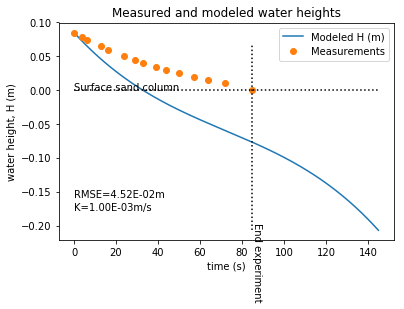

In [7]:
######################################################################
# PLOT RESULTS                                                       #
######################################################################

# Plot results from calculations
plt.plot(time,H,label='Modeled H (m)')

#Plot results from experiment
with open('1234567_data.csv') as csvfile:  # Open data file, adjust name & path as needed!!
                                        # In your case it should be name it #######_H.csv, 
                                        # with your student number instead of ‘#######’.

    readCSV = csv.reader(csvfile, delimiter=',')      
    tex = []      # Array for experiment times
    Hex = []      # Array for measure water height, H (m)
    for row in readCSV:
        te = row[0]          # Read time t (ASCII)
        He = row[1]          # Read water height H (ASCII)
        tex.append(float(te))      # Convert to number and store in array
        Hex.append(float(He))      # Convert to number and store in array

plt.plot(tex,Hex, 'o', label='Measurements')

# Plot horizontal line at H=0
plt.plot((0,t_end),(0,0), 'k', linestyle=':')
plt.text(0, 0, 'Surface sand column', fontsize=10)

# Plot vertical line at t_end
plt.plot((tend,tend),(H.min(), H.max()*0.8), 'k', linestyle=':')

# Plot analytical results
# If you happen to have an analytical solution you could plot it as well, just to check


# Plot labels, title, legend
plt.xlabel('time (s)')
plt.ylabel('water height, H (m)')
plt.legend(loc='best')
plt.title('Measured and modeled water heights')

######################################################################
# CALCULATE ROOT-MEAN-SQUARE ERROR                                   #
######################################################################

# Calculate error
Hm = []              # Array to hold calculated water heights at experimental time

for mt in tex:           # For all measurement points
    # Identify calculated points associated with data points
    # Note: Due to numerical errors, one cannot automatically assume any measurement time can be found in model time. 
    #       There are many calculated points separated at dt (default 0.1 s) 
    #       so finding the first point in model time larger than, or equal to, the measurement time is good enough
    
    ind=np.where(time>=mt)   # Indices for all entries larger than, or equal to, experiment time
    a = ind[0][0]           # Lowest index larger than, or equal to, experiment time
    Hm.append(H[a])         # Modeled water height at experimental time

# Calculate RMSE
# Often, you would give equal weights to all measurements but you may want to give double or triple weights
# to the first measurement and the last measurement because these should be better
weights = np.ones(len(Hm))     # Equal weights of 1 to all errors
weights[0] = 3                 # Adjust weight for first measurement (tripled default)
weights[-1] = 2                # Adjust weight for last measurement (doubled default)

error = m.sqrt(mse(Hex,Hm,weights))  # Calculates root-mean-square error between measured, Hm, and true value, Hex

# Report RMSE and K
print('The Root-Mean-Square Error is'+'\033[1m'+'\033[4m',
      f"{error:.3E}", '\033[0m'+'meters.')
scale = abs(H.max())+abs(H.min())     # Parameter for placing text
under = H.min()                       # Parameter for placing text
plt.text(0, under+scale/6,'RMSE=' f"{error:.2E}" 'm', fontsize=10, )
plt.text(0, under+scale/10,'K=' f"{K:.2E}" 'm/s', fontsize=10, )
plt.text(tend, under, 'End experiment', fontsize=10, rotation=270)

print() # Suppresses gratuitous output

#### Final questions
The figure above summarizes the results of this experiment. Please add some comments here on:
1. How reasonable are the porosity results compared to Wikipedia https://en.wikipedia.org/wiki/Porosity?


2. How do K results compare https://en.wikipedia.org/wiki/Hydraulic_conductivity#Ranges_of_values_for_natural_materials?


3. How accurate do you think the measurements are (differentiate) and where things may be improved?


4. Anything particular about the sand you used or other observations you want to share?


Save this Jupyter Notebook and **make a copy as pdf** before zipping the complete directory. The pdf serves easy checking of the main content. The other files (pictures, Notebook, csv, xlc) serve to check details in case of unclarities. Probably the easiest way to make a pdf is to go to the 'File' menu of Jupyter, then select 'Print Preview', then right-click on the print preview that opens up, and choose to 'Save to pdf'. There is also a 'Download as PDF via LaTeX' option, but this requires additional software installation. Make sure all filenames, including that of Notebook and pdf start with your student number.

#### Thanks for doing this at home!